##**Creating Derived Variables**

In [8]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LogisticRegression as logreg
from geopy.geocoders import Nominatim
import uszipcode
import uszipcode
from uszipcode import SearchEngine
import geopy.distance


In [9]:
!pip install uszipcode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
vars2 = pd.read_csv('VarListEx.csv', sep=',', encoding='latin-1')

In [11]:
vars2

,Week_Year,Personnel_ID,Driver_First_Name,Driver_Last_Name,Driver_Middle_Initial,Company_Hire_Date,Agent_ID,Customer_Name,Customer_ID,Required_Call_Interval,...,Turnover RIsk - Low,Dummy_Recruiter,State_Dummy,Min_Wage,Fleet_Manager_Dummy,Job_Dummy,Agent_ID_Dummy,Employment_Status,Calling During Work Time,Unnamed: 56
0,202101.0,126787.0,John,Doe,M,20220110.0,4.0,FexEx,32.0,Once a week,...,none,none,none,none,none,none,none,none,none,none
1,202101.0,126787.0,John,Doe,M,20220110.0,4.0,FexEx,42.0,Once a month,...,none,none,none,none,none,none,none,none,none,none
2,202101.0,126787.0,John,Doe,M,20220110.0,4.0,FexEx,94.0,Once a year,...,none,none,none,none,none,none,none,none,none,none
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
end = vars2.columns.get_loc("Distance from zip to operating center")

In [13]:
vars2=vars2.dropna()
print(vars2)

   Week_Year  Personnel_ID Driver_First_Name Driver_Last_Name  \
0   202101.0      126787.0              John              Doe   
1   202101.0      126787.0              John              Doe   
2   202101.0      126787.0              John              Doe   

  Driver_Middle_Initial  Company_Hire_Date  Agent_ID Customer_Name  \
0                     M         20220110.0       4.0         FexEx   
1                     M         20220110.0       4.0         FexEx   
2                     M         20220110.0       4.0         FexEx   

   Customer_ID Required_Call_Interval  ...  Turnover RIsk - Low  \
0         32.0            Once a week  ...                 none   
1         42.0           Once a month  ...                 none   
2         94.0            Once a year  ...                 none   

   Dummy_Recruiter State_Dummy Min_Wage  Fleet_Manager_Dummy Job_Dummy  \
0             none        none     none                 none      none   
1             none        none     none  

In [14]:
print(vars2.columns)

Index(['Week_Year', 'Personnel_ID', 'Driver_First_Name', 'Driver_Last_Name',
       'Driver_Middle_Initial', 'Company_Hire_Date', 'Agent_ID',
       'Customer_Name', 'Customer_ID', 'Required_Call_Interval',
       'PDA_Program_Start_Date', 'PDA_Program_Stop_Date',
       'Turnover_Risk_Rating', 'Ticket_Note_Week', 'Termination_Date',
       'Termination_Type', 'Termination_Reason', 'Division', 'Fleet_Manager',
       'Rectuiter', 'Retention_Codes', 'Escalated_Retention_Codes',
       'Resolved_Retention_Codes', 'Retention_Codes_PDA',
       'Retention_Codes_Client', 'PDA Program Name', 'Job',
       'Orientation Location', 'Operating Center', 'State', 'Zip_Code', 'City',
       'Vehicle_Number', 'Parking_Location', 'Career_Level', 'Birthdate',
       'Previous_Carrier', 'Distance from zip to operating center',
       'Count_Retention_Code_Total', 'Count_Retention_Code_Resolved',
       'Count_Retention_Code_Unresolved', 'Count_Escalated', 'Resolved_PDA',
       'Resolved_Client', 'VQ_D

In [15]:
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
!pip install uszipcode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


####Distance from zip to operating center

In [17]:
def placetolatlong(place):
  try:
    if np.isnan(place):
      return "nan", "nan"
  except:
    pass
  try:
    if math.isnan (place):
      return "nan", "nan"
  except:
    pass
  try:
    if place!=place:
      return "nan", "nan"
  except:
    pass
  try:
    if place == "nan":
      return "nan", "nan"
  except:
    pass
  geolocator = Nominatim(user_agent="geoapiExercises")
  #place = "Dallas, Texas"
  if place in range(0,9999999):
    
    search = SearchEngine()
    place = search.by_zipcode(int(place)).major_city
  try:
    placestr=str(place)
    location = geolocator.geocode(placestr)
    dataloc = location.raw
    datalocstring=dict(dataloc)
    print(location)
    return datalocstring['lat'], datalocstring['lon'];
  except:
    pass
  for i in range(len(str(place))):
    if i<2:
      continue
    for m in range(len(str(place))):
      if m>len(str(place))-3:
        continue
      if i<m:
        try:
          
          placestr=str(place)
          print(placestr[i:m])
          location = geolocator.geocode(placestr[i:m])
          print(place)
          print(location)
          dataloc = location.raw
          datalocstring=dict(dataloc)
          print(location)
          if "United States" in str(location):
            print(placestr[i:m])
            print("Found city:",placestr[i:m])
            return datalocstring['lat'], datalocstring['lon'];
        except:
          pass
  print("Error: got to end of function. Returning nan values")
  return "nan", "nan"
  #print(dataloc)
  

In [18]:
vars_length=len(vars2)
iteration = 0
ziplat = 0
ziplon = 0
opcenlat = 0
opcenlon = 0
isnan2 = 0
for dist in vars2['Distance from zip to operating center']:
  isnan2 = 0
  #dist between zip and operating location
  ziplat, ziplon = placetolatlong(vars2['Zip_Code'][iteration])
  opcenlat, opcenlong = placetolatlong(vars2['Operating Center'][iteration])
  
  print("oppecenlat:",opcenlat)
  print(opcenlong)
  coords_1 = [ziplat, ziplon]
  coords_2 = [opcenlat, opcenlong]
  try:
    if np.isnan(ziplat) or np.isnan(opcenlat):
      vars2['Distance from zip to operating center'][iteration] =  "nan"
      isnan2=1
  except:
    pass
  try:
    if math.isnan(ziplat) or math.isnan(opcenlat):
      vars2['Distance from zip to operating center'][iteration] = "nan"
      isnan2=1
  except:
    pass
  if isnan2==1:
    vars2['Distance from zip to operating center'][iteration] = geopy.distance.geodesic(coords_1, coords_2).miles
  iteration +=1
  #print("DISTANCE:", geopy.distance.geodesic(coords_1, coords_2).miles)
  
print (vars2['Distance from zip to operating center'])

Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!
Bentonville, Benton County, Arkansas, United States
-
IA-Des Moines-PTC
None
-D
-De
IA-Des Moines-PTC
Deutschland
Deutschland
-Des
IA-Des Moines-PTC
Dej, Cluj, România
Dej, Cluj, România
-Des 
IA-Des Moines-PTC
Dej, Cluj, România
Dej, Cluj, România
-Des M
-Des Mo
IA-Des Moines-PTC
MO, 11, Rue des Chardonnerets, Quartier des oiseaux 2, La Barbée, Les Landes-Genusson, La Roche-sur-Yon, Vendée, Pays de la Loire, France métropolitaine, 85130, France
MO, 11, Rue des Chardonnerets, Quartier des oiseaux 2, La Barbée, Les Landes-Genusson, La Roche-sur-Yon, Vendée, Pays 

In [19]:
#distance from operating center


####Count_Retention_Code_Total

In [20]:
def weektoweeklst(currentdate4):
  return [int((str(currentdate4)[:4])), int((str(int(currentdate4))[-2:]))]

In [21]:

print(max(vars2['Week_Year']))

202101.0


In [22]:
#Count_Retention_Code_Total
#Counts of retention codes for specific complaints (i.e., home time, miles, equipment) over the past X weeks.  Models will estimate different number of weeks/month to find the best model
currentdate = max(vars2['Week_Year'])
temp=["2021","01"]
stringdates= ""
for i in range(42):
  if i == 0:
    stringdates=temp[0]+temp[1]
    continue
  if temp[1]==0:
    temp[1]=52
    temp[0]=int(temp[0])-1
  else:
    tempz = temp[1]
    temp[1] = int(tempz) - 1
  stringdates=stringdates+","
  stringdates=stringdates+str(temp[0])
  stringdates=stringdates+str(temp[1])
  #print(stringdates)
  #print(i)
activeweeklist = stringdates.split(",")
print(activeweeklist)

['202101', '20210', '202052', '202051', '202050', '202049', '202048', '202047', '202046', '202045', '202044', '202043', '202042', '202041', '202040', '202039', '202038', '202037', '202036', '202035', '202034', '202033', '202032', '202031', '202030', '202029', '202028', '202027', '202026', '202025', '202024', '202023', '202022', '202021', '202020', '202019', '202018', '202017', '202016', '202015', '202014', '202013']


In [23]:
activeweeklist[1]='202100'
print(activeweeklist)

['202101', '202100', '202052', '202051', '202050', '202049', '202048', '202047', '202046', '202045', '202044', '202043', '202042', '202041', '202040', '202039', '202038', '202037', '202036', '202035', '202034', '202033', '202032', '202031', '202030', '202029', '202028', '202027', '202026', '202025', '202024', '202023', '202022', '202021', '202020', '202019', '202018', '202017', '202016', '202015', '202014', '202013']


In [24]:
def unique(list1):

  # initialize a null list
  unique_list = []

  # traverse for all elements
  for x in list1:
      # check if exists in unique_list or not
      if x not in unique_list:
          unique_list.append(x)
  # print list
  return unique_list
for iteration in range(int(len(vars2['Agent_ID']))):
  vars2['Count_Retention_Code_Total'][iteration]=0
for yearmo in activeweeklist:
  #print(unique(vars2['Agent_ID']))
  
  for person in unique(vars2['Agent_ID']):
    maxcodes = 0
    for iteration in range(int(len(vars2['Agent_ID']))):
      oldretentioncodes=[]
      personlength = 0
      if not int(yearmo) == int(vars2["Week_Year"][iteration]):
        #print("here")
        continue
      if not int(person) == int(vars2['Agent_ID'][iteration]):
        print("here2")
        continue
      codelist= str(vars2['Retention_Codes'][iteration]).split(",")
      print("codelist:",codelist)
      
      for code in codelist:
        print(oldretentioncodes)
        
        if not list(code) in oldretentioncodes:
          personlength+=1
          oldretentioncodes.append(code)
          if personlength>maxcodes:
            maxcodes=personlength
            for iteration2 in range(int(len(vars2['Agent_ID']))):
              
              if int(vars2['Agent_ID'][iteration2])==int(person):
                #print("personlength:",maxcodes)
                print(maxcodes)
                #print(vars2['Count_Retention_Code_Resolved'][iteration2])
                if maxcodes > vars2['Count_Retention_Code_Total'][iteration2]:
                  vars2['Count_Retention_Code_Total'][iteration2] = maxcodes
print(vars2['Count_Retention_Code_Total'])

codelist: ['123', ' 234']
[]
1
1
1
['123']
2
2
2
codelist: ['123', ' 234']
[]
['123']
codelist: ['123', ' 234']
[]
['123']
0    2
1    2
2    2
Name: Count_Retention_Code_Total, dtype: object


<ipython-input-24-0f5b37bd17b0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars2['Count_Retention_Code_Total'][iteration]=0
<ipython-input-24-0f5b37bd17b0>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars2['Count_Retention_Code_Total'][iteration2] = maxcodes


###Count_Retention_Code_Resolved

In [25]:
for iteration in range(int(len(vars2['Agent_ID']))):
  vars2['Count_Retention_Code_Resolved'][iteration]=0
for yearmo in activeweeklist:
  #print(unique(vars2['Agent_ID']))
  
  for person in unique(vars2['Agent_ID']):
    maxcodes = 0
    for iteration in range(int(len(vars2['Agent_ID']))):
      oldretentioncodes=[]
      personlength = 0
      if not int(yearmo) == int(vars2["Week_Year"][iteration]):
        #print("here")
        continue
      if not int(person) == int(vars2['Agent_ID'][iteration]):
        print("here2")
        continue
      codelist= str(vars2['Resolved_Retention_Codes'][iteration]).split(",")
      print("codelist:",codelist)
      
      for code in codelist:
        print(oldretentioncodes)
        
        if not list(code) in oldretentioncodes:
          personlength+=1
          oldretentioncodes.append(code)
          if personlength>maxcodes:
            maxcodes=personlength
            for iteration2 in range(int(len(vars2['Agent_ID']))):
              
              if int(vars2['Agent_ID'][iteration2])==int(person):
                #print("personlength:",maxcodes)
                print(maxcodes)
                #print(vars2['Count_Retention_Code_Resolved'][iteration2])
                if maxcodes > vars2['Count_Retention_Code_Resolved'][iteration2]:
                  vars2['Count_Retention_Code_Resolved'][iteration2] = maxcodes
print(vars2['Count_Retention_Code_Resolved'])

codelist: ['897', ' 896', ' 342']
[]
1
1
1
['897']
2
2
2
['897', ' 896']
3
3
3
codelist: ['897', ' 896', ' 342']
[]
['897']
['897', ' 896']
codelist: ['897', ' 896', ' 342']
[]
['897']
['897', ' 896']
0    3
1    3
2    3
Name: Count_Retention_Code_Resolved, dtype: object


<ipython-input-25-4e8ba6aaa1f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars2['Count_Retention_Code_Resolved'][iteration]=0
<ipython-input-25-4e8ba6aaa1f6>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars2['Count_Retention_Code_Resolved'][iteration2] = maxcodes


###Count_Retention_Code_Unresolved

In [26]:
for iteration in range(int(len(vars2['Agent_ID']))):
  vars2['Count_Retention_Code_Unresolved'][iteration]=0
for yearmo in activeweeklist:
  #print(unique(vars2['Agent_ID']))
  
  for person in unique(vars2['Agent_ID']):
    oldretentioncodes=[]
    maxcodes = 0
    for iteration in range(int(len(vars2['Agent_ID']))):
      vars2['Count_Retention_Code_Unresolved'][iteration]=vars2['Count_Retention_Code_Total'][iteration]-vars2['Count_Retention_Code_Resolved'][iteration]
print(vars2['Count_Retention_Code_Unresolved'])

0    -1
1    -1
2    -1
Name: Count_Retention_Code_Unresolved, dtype: object


<ipython-input-26-43040abf8dc7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars2['Count_Retention_Code_Unresolved'][iteration]=0
<ipython-input-26-43040abf8dc7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars2['Count_Retention_Code_Unresolved'][iteration]=vars2['Count_Retention_Code_Total'][iteration]-vars2['Count_Retention_Code_Resolved'][iteration]


###Count_Escalated

In [27]:
for iteration in range(int(len(vars2['Agent_ID']))):
  vars2['Count_Escalated'][iteration]=0
for yearmo in activeweeklist:
  #print(unique(vars2['Agent_ID']))
  
  for person in unique(vars2['Agent_ID']):
    maxcodes = 0
    for iteration in range(int(len(vars2['Agent_ID']))):
      oldretentioncodes=[]
      personlength = 0
      if not int(yearmo) == int(vars2["Week_Year"][iteration]):
        #print("here")
        continue
      if not int(person) == int(vars2['Agent_ID'][iteration]):
        print("here2")
        continue
      codelist= str(vars2['Escalated_Retention_Codes'][iteration]).split(",")
      print("codelist:",codelist)
      
      for code in codelist:
        print(oldretentioncodes)
        
        if not list(code) in oldretentioncodes:
          personlength+=1
          oldretentioncodes.append(code)
          if personlength>maxcodes:
            maxcodes=personlength
            for iteration2 in range(int(len(vars2['Agent_ID']))):
              
              if int(vars2['Agent_ID'][iteration2])==int(person):
                #print("personlength:",maxcodes)
                print(maxcodes)
                #print(vars2['Count_Retention_Code_Resolved'][iteration2])
                if maxcodes > vars2['Count_Escalated'][iteration2]:
                  vars2['Count_Escalated'][iteration2] = maxcodes
print(vars2['Count_Escalated'])

codelist: ['897', ' 896', ' 342']
[]
1
1
1
['897']
2
2
2
['897', ' 896']
3
3
3
codelist: ['897', ' 896', ' 342']
[]
['897']
['897', ' 896']
codelist: ['897', ' 896', ' 342']
[]
['897']
['897', ' 896']
0    3
1    3
2    3
Name: Count_Escalated, dtype: object


<ipython-input-27-1197f583b4af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars2['Count_Escalated'][iteration]=0
<ipython-input-27-1197f583b4af>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars2['Count_Escalated'][iteration2] = maxcodes


###Resolved_PDA

In [28]:
for iteration in range(int(len(vars2['Agent_ID']))):
  vars2['Resolved_PDA'][iteration]=0
for yearmo in activeweeklist:
  #print(unique(vars2['Agent_ID']))
  
  for person in unique(vars2['Agent_ID']):
    maxcodes = 0
    for iteration in range(int(len(vars2['Agent_ID']))):
      oldretentioncodes=[]
      personlength = 0
      if not int(yearmo) == int(vars2["Week_Year"][iteration]):
        #print("here")
        continue
      if not int(person) == int(vars2['Agent_ID'][iteration]):
        print("here2")
        continue
      codelist= str(vars2['Retention_Codes_PDA'][iteration]).split(",")
      print("codelist:",codelist)
      
      for code in codelist:
        print(oldretentioncodes)
        
        if not list(code) in oldretentioncodes:
          personlength+=1
          oldretentioncodes.append(code)
          if personlength>maxcodes:
            maxcodes=personlength
            for iteration2 in range(int(len(vars2['Agent_ID']))):
              
              if int(vars2['Agent_ID'][iteration2])==int(person):
                #print("personlength:",maxcodes)
                print(maxcodes)
                #print(vars2['Count_Retention_Code_Resolved'][iteration2])
                if maxcodes > vars2['Resolved_PDA'][iteration2]:
                  vars2['Resolved_PDA'][iteration2] = maxcodes
print(vars2['Resolved_PDA'])

<ipython-input-28-9f32a3b14f16>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars2['Resolved_PDA'][iteration]=0


codelist: ['897', ' 896', ' 342']
[]
1
1
1
['897']
2
2
2
['897', ' 896']
3
3
3
codelist: ['897', ' 896', ' 342']
[]
['897']
['897', ' 896']
codelist: ['897', ' 896', ' 342']
[]
['897']
['897', ' 896']
0    3
1    3
2    3
Name: Resolved_PDA, dtype: object


<ipython-input-28-9f32a3b14f16>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars2['Resolved_PDA'][iteration2] = maxcodes


###Resolved_Client

In [29]:
for iteration in range(int(len(vars2['Agent_ID']))):
  vars2['Resolved_Client'][iteration]=0
for yearmo in activeweeklist:
  #print(unique(vars2['Agent_ID']))
  
  for person in unique(vars2['Agent_ID']):
    maxcodes = 0
    for iteration in range(int(len(vars2['Agent_ID']))):
      oldretentioncodes=[]
      personlength = 0
      if not int(yearmo) == int(vars2["Week_Year"][iteration]):
        #print("here")
        continue
      if not int(person) == int(vars2['Agent_ID'][iteration]):
        print("here2")
        continue
      codelist= str(vars2['Retention_Codes_Client'][iteration]).split(",")
      print("codelist:",codelist)
      
      for code in codelist:
        print(oldretentioncodes)
        
        if not list(code) in oldretentioncodes:
          personlength+=1
          oldretentioncodes.append(code)
          if personlength>maxcodes:
            maxcodes=personlength
            for iteration2 in range(int(len(vars2['Agent_ID']))):
              
              if int(vars2['Agent_ID'][iteration2])==int(person):
                #print("personlength:",maxcodes)
                print(maxcodes)
                #print(vars2['Count_Retention_Code_Resolved'][iteration2])
                if maxcodes > vars2['Resolved_Client'][iteration2]:
                  vars2['Resolved_Client'][iteration2] = maxcodes
print(vars2['Resolved_Client'])

<ipython-input-29-0220c3d03c59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars2['Resolved_Client'][iteration]=0
<ipython-input-29-0220c3d03c59>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars2['Resolved_Client'][iteration2] = maxcodes


codelist: ['897', ' 896', ' 342']
[]
1
1
1
['897']
2
2
2
['897', ' 896']
3
3
3
codelist: ['897', ' 896', ' 342']
[]
['897']
['897', ' 896']
codelist: ['897', ' 896', ' 342']
[]
['897']
['897', ' 896']
0    3
1    3
2    3
Name: Resolved_Client, dtype: object


###Termination_Reason (UNTESTED)



In [30]:
for iteration in range(int(len(vars2['Agent_ID']))):
  vars2['VQ_Dummy'][iteration]="error: neither voluntary quit or Disqualified Quit"
for iteration in range(int(len(vars2['Agent_ID']))):
  if vars2['Termination_Reason'][iteration] == "Voluntary Quit":
    id = vars2['Agent_ID'][iteration]
    for iteration2 in range(int(len(vars2['Agent_ID']))):
      if vars2['Agent_ID'][iteration2] == id:
        if vars2['Termination_Reason'][iteration2] != "Voluntary Quit":
          vars2['VQ_Dummy'][iteration2] = 1
  if vars2['Termination_Reason'][iteration] == "Disqualified Quit":
    id = vars2['Agent_ID'][iteration]
    for iteration2 in range(int(len(vars2['Agent_ID']))):
      if vars2['Agent_ID'][iteration2] == id:
        if vars2['Termination_Reason'][iteration] == "Voluntary Quit":
          vars2['VQ_Dummy'][iteration]="error: both voluntary quit or Disqualified Quit"
        if vars2['Termination_Reason'][iteration2] != "Disqualified Quit":
          vars2['VQ_Dummy'][iteration2] = 1
print(vars2['VQ_Dummy'])

0    error: neither voluntary quit or Disqualified ...
1    error: neither voluntary quit or Disqualified ...
2    error: neither voluntary quit or Disqualified ...
Name: VQ_Dummy, dtype: object


<ipython-input-30-50e04c3b508f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars2['VQ_Dummy'][iteration]="error: neither voluntary quit or Disqualified Quit"


###Turnover Risk - High

In [31]:
for iteration in range(int(len(vars2['Agent_ID']))):
  vars2['Turnover Risk - High'][iteration]=0
for yearmo in activeweeklist:
  #print(unique(vars2['Agent_ID']))
  
  for person in unique(vars2['Agent_ID']):
    maxcodes = 0
    for iteration in range(int(len(vars2['Agent_ID']))):
      maxcodes = 0
      oldretentioncodes=[]
      personlength = 0
      if not int(yearmo) == int(vars2["Week_Year"][iteration]):
        #print("here")
        continue
      if not int(person) == int(vars2['Agent_ID'][iteration]):
        print("here2")
        continue
      if vars2['Turnover_Risk_Rating'][iteration] == "High":
        maxcodes = 1
      if vars2['Turnover Risk - High'][iteration]<maxcodes:
        maxcodes=maxcodes
        for iteration2 in range(int(len(vars2['Agent_ID']))):
          
          if int(vars2['Agent_ID'][iteration2])==int(person):
            #print("personlength:",maxcodes)
            print(maxcodes)
            #print(vars2['Count_Retention_Code_Resolved'][iteration2])
            if maxcodes > vars2['Turnover Risk - High'][iteration2]:
              vars2['Turnover Risk - High'][iteration2] = maxcodes
print(vars2['Turnover Risk - High'])

0    0
1    0
2    0
Name: Turnover Risk - High, dtype: object


<ipython-input-31-cb7b358b1f24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars2['Turnover Risk - High'][iteration]=0


###Turnover RIsk - Moderate

In [32]:
for iteration in range(int(len(vars2['Agent_ID']))):
  vars2['Turnover RIsk - Moderate'][iteration]=0
for yearmo in activeweeklist:
  #print(unique(vars2['Agent_ID']))
  
  for person in unique(vars2['Agent_ID']):
    maxcodes = 0
    for iteration in range(int(len(vars2['Agent_ID']))):
      maxcodes = 0
      oldretentioncodes=[]
      personlength = 0
      if not int(yearmo) == int(vars2["Week_Year"][iteration]):
        #print("here")
        continue
      if not int(person) == int(vars2['Agent_ID'][iteration]):
        print("here2")
        continue
      
      if vars2['Turnover_Risk_Rating'][iteration] == "Moderate":
        maxcodes = 1
      if vars2['Turnover RIsk - Moderate'][iteration]<maxcodes:
        maxcodes=maxcodes
        for iteration2 in range(int(len(vars2['Agent_ID']))):
          
          if int(vars2['Agent_ID'][iteration2])==int(person):
            #print("personlength:",maxcodes)
            print(maxcodes)
            #print(vars2['Count_Retention_Code_Resolved'][iteration2])
            if maxcodes > vars2['Turnover RIsk - Moderate'][iteration2]:
              if vars2['Turnover_Risk_Rating'][iteration] == "High":
                continue
              vars2['Turnover RIsk - Moderate'][iteration2] = maxcodes
print(vars2['Turnover RIsk - Moderate'])

0    0
1    0
2    0
Name: Turnover RIsk - Moderate, dtype: object


<ipython-input-32-3dc392bb0cb6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars2['Turnover RIsk - Moderate'][iteration]=0


###Turnover Risk - Low

In [33]:
for iteration in range(int(len(vars2['Agent_ID']))):
  vars2['Turnover RIsk - Low'][iteration]=0
for yearmo in activeweeklist:
  #print(unique(vars2['Agent_ID']))
  
  for person in unique(vars2['Agent_ID']):
    
    for iteration in range(int(len(vars2['Agent_ID']))):
      maxcodes = 0
      oldretentioncodes=[]
      personlength = 0
      if not int(yearmo) == int(vars2["Week_Year"][iteration]):
        #print("here")
        continue
      if not int(person) == int(vars2['Agent_ID'][iteration]):
        print("here2")
        continue
      
      if vars2['Turnover_Risk_Rating'][iteration] == "Low":
        print("HERE")
        maxcodes = 1
      if vars2['Turnover RIsk - Low'][iteration]<maxcodes:
        maxcodes=1
        for iteration2 in range(int(len(vars2['Agent_ID']))):
          if int(vars2['Agent_ID'][iteration2])==int(person):
            #print("personlength:",maxcodes)
            print(maxcodes)
            #print(vars2['Count_Retention_Code_Resolved'][iteration2])
            if maxcodes > vars2['Turnover RIsk - Low'][iteration2]:
              if vars2['Turnover_Risk_Rating'][iteration] == "High":
                continue
              if vars2['Turnover_Risk_Rating'][iteration] == "Moderate":
                continue
              vars2['Turnover RIsk - Low'][iteration2] = maxcodes
print(vars2['Turnover RIsk - Low'])

<ipython-input-33-c98b6d6f4f15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars2['Turnover RIsk - Low'][iteration]=0


HERE
1
1
1
HERE
HERE
0    1
1    1
2    1
Name: Turnover RIsk - Low, dtype: object


<ipython-input-33-c98b6d6f4f15>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars2['Turnover RIsk - Low'][iteration2] = maxcodes


###Dummy_Recruiter(Unfinished)

In [34]:
from sklearn.preprocessing import OneHotEncoder

oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(vars2[["Rectuiter"]])
print(oe_results)
pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_).head()
print(pd)
vars3=vars2
print(str(oe_style.categories_))
vars3 = vars2.join(pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_))
print(vars3)

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
<module 'pandas' from '/usr/local/lib/python3.8/dist-packages/pandas/__init__.py'>
[array(['Name of recruiter'], dtype=object)]
   Week_Year  Personnel_ID Driver_First_Name Driver_Last_Name  \
0   202101.0      126787.0              John              Doe   
1   202101.0      126787.0              John              Doe   
2   202101.0      126787.0              John              Doe   

  Driver_Middle_Initial  Company_Hire_Date  Agent_ID Customer_Name  \
0                     M         20220110.0       4.0         FexEx   
1                     M         20220110.0       4.0         FexEx   
2                     M         20220110.0       4.0         FexEx   

   Customer_ID Required_Call_Interval  ...  Dummy_Recruiter  State_Dummy  \
0         32.0            Once a week  ...             none         none   
1         42.0           Once a month  ...             none         none   
2         94.0            Once a year  ...             none    

###Min_Wage

In [35]:
minwage = pd.read_csv('minwage.csv', sep=',', encoding='latin-1')
for iteration in range(int(len(vars2['Agent_ID']))):
  statevars = vars2['State'][iteration]
  
  for state in minwage['State']:
    iteration2=0
    state = state[:-1]
    #print("state:",state)
    #print("statevars",statevars)
    if state == statevars:
      vars2['Min_Wage'][iteration] = minwage['minwage'][iteration2]
      iteration2 += 1
print(vars2['Min_Wage'])

0    $7.25 
1    $7.25 
2    $7.25 
Name: Min_Wage, dtype: object


<ipython-input-35-847720b1f35f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars2['Min_Wage'][iteration] = minwage['minwage'][iteration2]


###Fleet_Manager_Dummy (UNFINISHED)

In [36]:
from sklearn.preprocessing import OneHotEncoder

oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(vars2[["Fleet_Manager"]])
print(oe_results)
pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_).head()
print(pd)
vars3 = vars3.join(pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_))
print(vars3)

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
<module 'pandas' from '/usr/local/lib/python3.8/dist-packages/pandas/__init__.py'>
   Week_Year  Personnel_ID Driver_First_Name Driver_Last_Name  \
0   202101.0      126787.0              John              Doe   
1   202101.0      126787.0              John              Doe   
2   202101.0      126787.0              John              Doe   

  Driver_Middle_Initial  Company_Hire_Date  Agent_ID Customer_Name  \
0                     M         20220110.0       4.0         FexEx   
1                     M         20220110.0       4.0         FexEx   
2                     M         20220110.0       4.0         FexEx   

   Customer_ID Required_Call_Interval  ...  State_Dummy  Min_Wage  \
0         32.0            Once a week  ...         none      none   
1         42.0           Once a month  ...         none      none   
2         94.0            Once a year  ...         none      none   

  Fleet_Manager_Dummy Job_Dummy  Agent_ID_Dummy Employment_

###Job_Dummy (UNFINISHED)

In [37]:
oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(vars2[["Job"]])
print(oe_results)
pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_).head()
print(pd)
vars3 = vars3.join(pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_))
print(vars3)

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
<module 'pandas' from '/usr/local/lib/python3.8/dist-packages/pandas/__init__.py'>
   Week_Year  Personnel_ID Driver_First_Name Driver_Last_Name  \
0   202101.0      126787.0              John              Doe   
1   202101.0      126787.0              John              Doe   
2   202101.0      126787.0              John              Doe   

  Driver_Middle_Initial  Company_Hire_Date  Agent_ID Customer_Name  \
0                     M         20220110.0       4.0         FexEx   
1                     M         20220110.0       4.0         FexEx   
2                     M         20220110.0       4.0         FexEx   

   Customer_ID Required_Call_Interval  ...  Min_Wage  Fleet_Manager_Dummy  \
0         32.0            Once a week  ...      none                 none   
1         42.0           Once a month  ...      none                 none   
2         94.0            Once a year  ...      none                 none   

  Job_Dummy Agent_ID_Dummy 

###Agent_ID_Dummy (UNFINISHED)

In [38]:
oe_results = oe_style.fit_transform(vars2[["Agent_ID"]])
print(oe_results)
pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_).head()
print(pd)
vars3 = vars3.join(pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_))
print(vars3)
vars2=vars3

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
<module 'pandas' from '/usr/local/lib/python3.8/dist-packages/pandas/__init__.py'>
   Week_Year  Personnel_ID Driver_First_Name Driver_Last_Name  \
0   202101.0      126787.0              John              Doe   
1   202101.0      126787.0              John              Doe   
2   202101.0      126787.0              John              Doe   

  Driver_Middle_Initial  Company_Hire_Date  Agent_ID Customer_Name  \
0                     M         20220110.0       4.0         FexEx   
1                     M         20220110.0       4.0         FexEx   
2                     M         20220110.0       4.0         FexEx   

   Customer_ID Required_Call_Interval  ...  Fleet_Manager_Dummy  Job_Dummy  \
0         32.0            Once a week  ...                 none       none   
1         42.0           Once a month  ...                 none       none   
2         94.0            Once a year  ...                 none       none   

  Agent_ID_Dummy Employ

###Employment_Status

In [39]:
#Employment_Status
for iteration in range(int(len(vars2['Agent_ID']))):
  vars2['Employment_Status'][iteration]=0
iterationper = 0
for person in unique(vars2['Agent_ID']):
  termination = 0
  for iteration in range(int(len(vars2['Agent_ID']))):
    if vars2['Termination_Date'][iteration] in range (99999999):
      termination = 1
  if termination == 1:
    for iteration in range(int(len(vars2['Agent_ID']))):
      vars2['Termination_Date'][iteration]=1
  iterationper +=1
print(vars2['Termination_Date'])

<ipython-input-39-e2838f3637f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars2['Employment_Status'][iteration]=0


0    1.0
1    1.0
2    1.0
Name: Termination_Date, dtype: float64


<ipython-input-39-e2838f3637f3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars2['Termination_Date'][iteration]=1


##**Logit**

In [42]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LogisticRegression as logreg


raw0 = pd.read_csv('Default.csv')

# drop the observations that contain missing values
raw0.dropna()

raw0.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


#### i) .describe()

In [43]:
raw0.describe(include = 'all')

,Unnamed: 0,default,student,balance,income
count,10000.00000,10000,10000,10000.000000,10000.000000
unique,NaN,2,2,NaN,NaN
top,NaN,No,No,NaN,NaN
freq,NaN,9667,7056,NaN,NaN
mean,5000.50000,NaN,NaN,835.374886,33516.981876
std,2886.89568,NaN,NaN,483.714985,13336.639563
min,1.00000,NaN,NaN,0.000000,771.967729
25%,2500.75000,NaN,NaN,481.731105,21340.462903
50%,5000.50000,NaN,NaN,823.636973,34552.644802
75%,7500.25000,NaN,NaN,1166.308386,43807.729272


####ii) crosstab

In [44]:
pd.crosstab(raw0.student,raw0.default)

default,No,Yes
student,,
No,6850,206
Yes,2817,127


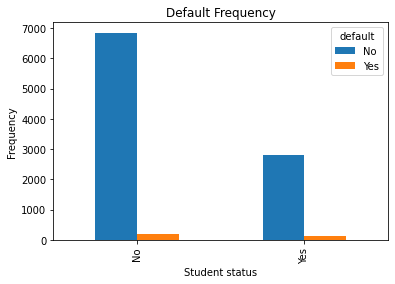

In [45]:
pd.crosstab(raw0.student,raw0.default).plot(kind='bar')

plt.title('Default Frequency')
plt.xlabel('Student status')
plt.ylabel('Frequency')
plt.show()

####iii) Histogram

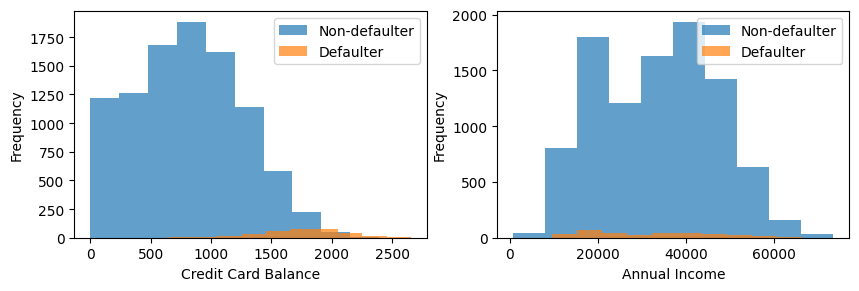

In [46]:
plt.figure(figsize=(10, 3), dpi=100)

plt.subplot(1, 2, 1)
plt.hist(raw0.balance.loc[raw0.default == 'No'],label='Non-defaulter',alpha=0.7) 
plt.hist(raw0.balance.loc[raw0.default == 'Yes'],label='Defaulter',alpha=0.7) 
plt.xlabel('Credit Card Balance')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(raw0.income.loc[raw0.default == 'No'],label='Non-defaulter',alpha=0.7) 
plt.hist(raw0.income.loc[raw0.default == 'Yes'],label='Defaulter',alpha=0.7) 
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.legend()

plt.show()

####iv) Boxplot

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


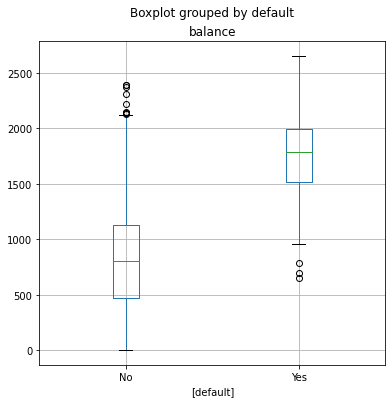

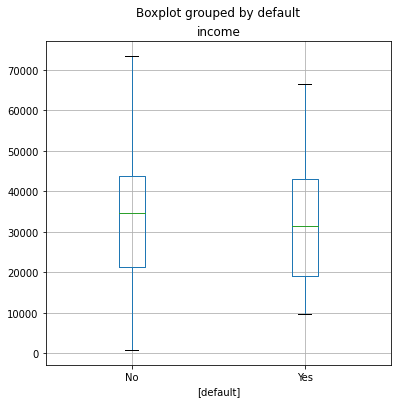

In [47]:
boxplot = raw0.boxplot(column='balance', by=['default'], figsize=(6,6))
boxplot = raw0.boxplot(column='income', by=['default'], figsize=(6,6))

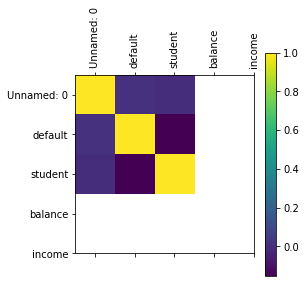

In [48]:
import matplotlib.pyplot as plt

plt.matshow(raw0.corr())
plt.xticks(np.arange(5), raw0.columns, rotation=90)
plt.yticks(np.arange(5), raw0.columns, rotation=0)
plt.colorbar()
plt.show()

### 2) Run a logistic regression on the default data

In [49]:
# create dummies
raw0.default=pd.get_dummies(raw0.default,drop_first=True) # default = 1
raw0.student=pd.get_dummies(raw0.student,drop_first=True) # student = 1

In [50]:
# Run a logistic regression
import statsmodels.api as sm
import statsmodels.formula.api as smf
Y = raw0.default
X = raw0.iloc[:,2:]
X = sm.add_constant(X)

logitres=sm.Logit(Y,X).fit() # plug in Y first; case sensitive: Logit (o) logit(x)

print(logitres.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 10
                       Results: Logit
Model:              Logit            Pseudo R-squared: inf   
Dependent Variable: default          AIC:              inf   
Date:               2023-02-08 03:25 BIC:              inf   
No. Observations:   10000            Log-Likelihood:   -inf  
Df Model:           3                LL-Null:          0.0000
Df Residuals:       9996             LLR p-value:      1.0000
Converged:          1.0000           Scale:            1.0000
No. Iterations:     10.0000                                  
-------------------------------------------------------------
            Coef.   Std.Err.    z     P>|z|   [0.025   0.975]
-------------------------------------------------------------
const      -10.8690   0.4923 -22.0793 0.0000 -11.8339 -9.9042
student     -0.6468   0.2363  -2.7376 0.0062  -1.1098 -0.1837
balance      0.0057   0.0002  24.7365 0.0000   0.0053  0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:547: HessianInversionWarnin

In [51]:
# logistic regression with interaction and higer order

logitres2=smf.logit('default ~ student + income + balance + student*balance + student*income + np.power(income,2) + np.power(balance,2)', data=raw0).fit() # logit (o), Logit(x)

print(logitres2.summary2())

Optimization terminated successfully.
         Current function value: 0.078496
         Iterations 12
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.462      
Dependent Variable:  default           AIC:               1585.9225  
Date:                2023-02-08 03:25  BIC:               1643.6052  
No. Observations:    10000             Log-Likelihood:    -784.96    
Df Model:            7                 LL-Null:           -1460.3    
Df Residuals:        9992              LLR p-value:       1.7668e-287
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      12.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
---------------------------------------------------------------------
Intercept            -9.9217   1.5375 -6.4530 0.0000 -12.9352 -6.9082
student        

###3) Calculate/show default probability for students and non-students, separately, as a function of balance, holding income at its mean

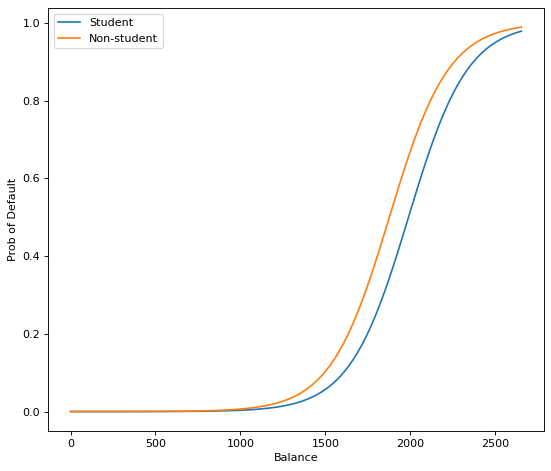

In [52]:
grid0 = np.linspace(raw0.balance.min(), raw0.balance.max(), 100).reshape((100,1))
xx1 = np.concatenate((np.ones((100,1)),np.ones((100,1)),grid0,np.ones((100,1))*raw0.income.mean()), axis=1)
xx2 = np.concatenate((np.ones((100,1)),np.zeros((100,1)),grid0,np.ones((100,1))*raw0.income.mean()), axis=1)
prd1 = logitres.predict(xx1)
prd2 = logitres.predict(xx2)

plt.figure(figsize=(8, 7), dpi=80)
plt.plot(grid0,prd1,label='Student')
plt.plot(grid0,prd2,label='Non-student')
plt.xlabel('Balance')
plt.ylabel('Prob of Default')
plt.legend()
plt.show()

###5) Evaluate the logit regression

In [53]:
#in logistic regression, how do we calculate x*?
#want to predict default status of x*
#logit cdf /\(X*'β) = default probability
#if default prob >.5 predict Y=1
#if not predict non-default
#calculating the proportion of correct classifications
#like cross validation
#split data into two part and use one part to estimate

####i) Out of sample prediction accuracy: test error

In [54]:
# Note: logit in statsmodels provides the summary table but logit in sklearn.linear_model doesn't.
# However, logit in sklearn.linear_model has some useful attributes like prediction score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3) #spare 30% of data for test set
logitres = LogisticRegression(fit_intercept=0, solver = 'lbfgs').fit(X_train, y_train) #run log reg. don't include intercept. we have already included intercept into x. because x already include intercept
#lgfbs is a derivative based numerical optimizer. fit logit model to training set. 

logitres.score(X_test, y_test)
#calculate correct classification rate. number is misleading. we have class imbalance. most people are not defaulting. if you get everyone and say they're not defaulting. so use confusion matrix instead

0.9653333333333334

####ii) Confusion Matrix

In [55]:
from sklearn.metrics import confusion_matrix

y_pred = logitres.predict(X_test) # prediction

total=0
for pred in y_pred:
  total+=pred
print(total/len(y_pred))
#predict default status in x test
cm_logit = confusion_matrix(y_test, y_pred)
#compare those predictions with actual
print(cm_logit)
print("Correct Classifications:", cm_logit[0][0]+cm_logit[1,1])
print("Incorrect Classifications:", cm_logit[0][1]+cm_logit[1,0])
#rows = actual class. first row non default. second row default
#columns = predicted class. first column is non default. second is default
#AB
#CD
#A,D : Correct classification
#C,D : INcorrect classification
#Correct classfication rate = (A+D)/(A+B+C+D)
#From table can calculate 
#B is type 1 error
#(non default is null), default is alt
#type 2 error is C
#precision: D/(D+B), type 1 error emphasis
#recall: D/(D+C), type two error emphassis
#when B increases, precious decreases, but C decreases, so recall increases. Tradeoff between precision and recall
#increase number to say Y=1, B and D will decrease. A and C will increases. precision will increase. but recall decreases
#

0.012333333333333333
[[2879   20]
 [  84   17]]
Correct Classifications: 2896
Incorrect Classifications: 104


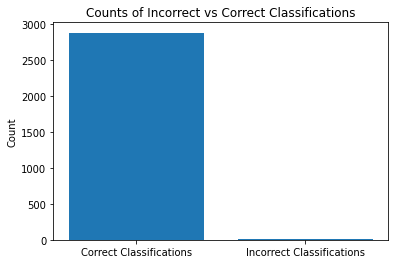

In [56]:
import numpy as np
xaxis = ["Correct Classifications", "Incorrect Classifications"]
yaxis = cm_logit[0][0], cm_logit[1][1]
  
# making the bar chart on the data
plt.bar(xaxis, yaxis)
  
# calling the function to add value labels

plt.ylabel("Count")
  
# giving title to the plot
plt.title("Counts of Incorrect vs Correct Classifications")
  
# giving X and Y labels
plt.ylabel("Count")
  
# visualizing the plot
plt.show()

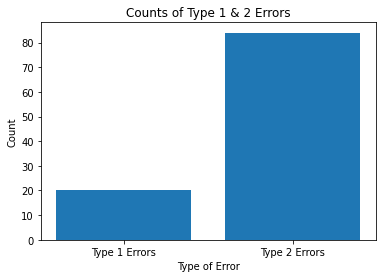

In [57]:
import numpy as np
xaxis = ["Type 1 Errors", "Type 2 Errors"]
yaxis = cm_logit[0][1], cm_logit[1][0]
  
# making the bar chart on the data
plt.bar(xaxis, yaxis)
  
# calling the function to add value labels
plt.xlabel("Type Of Error")
plt.ylabel("Count")
  
# giving title to the plot
plt.title("Counts of Type 1 & 2 Errors")
  
# giving X and Y labels
plt.xlabel("Type of Error")
plt.ylabel("Count")
  
# visualizing the plot
plt.show()

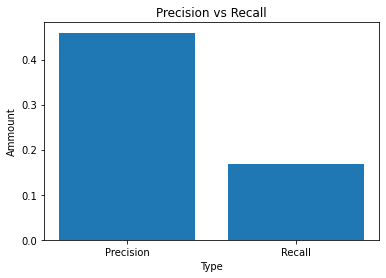

In [58]:
import numpy as np
xaxis = ["Precision", "Recall"]
yaxis = [cm_logit[1][1]/(cm_logit[1][1]+cm_logit[0][1]), cm_logit[1][1]/(cm_logit[1][1]+cm_logit[1][0])]
  
# making the bar chart on the data
plt.bar(xaxis, yaxis)
  
# calling the function to add value labels
plt.xlabel("Type")
plt.ylabel("Ammount")
  
# giving title to the plot
plt.title("Precision vs Recall")
  
# visualizing the plot
plt.show()

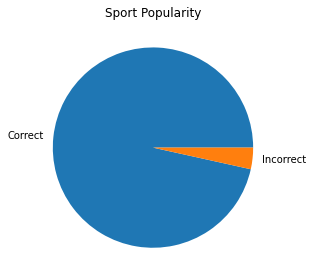

In [59]:
import matplotlib.pyplot as plt
values = [cm_logit[0][0]+cm_logit[1][1], cm_logit[0][1]+cm_logit[1][0]]
labels = ['Correct', 'Incorrect']

fig, ax = plt.subplots()
ax.pie(values, labels=labels)
ax.set_title('Sport Popularity')
plt.tight_layout()

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2899
           1       0.46      0.17      0.25       101

    accuracy                           0.97      3000
   macro avg       0.72      0.58      0.61      3000
weighted avg       0.95      0.97      0.96      3000



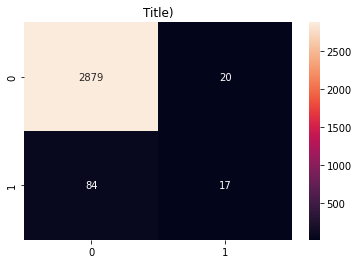

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Title)')

print(classification_report(y_test,y_pred))

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2899
           1       0.46      0.17      0.25       101

    accuracy                           0.97      3000
   macro avg       0.72      0.58      0.61      3000
weighted avg       0.95      0.97      0.96      3000



The Receiver Operating Characteristic curve is basically a plot between false positive rate and true positive rate for a number of threshold values lying between 0 and 1.
The ROC curve helps us compare curves of different models with different thresholds whereas the AUC (area under the curve) gives us a summary of the model skill.

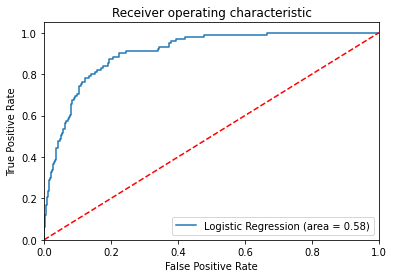

In [62]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logitres.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logitres.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).
 The Jupyter notebook used to make this post is available here. I would be pleased to receive feedback or questions on any of the above.

In [63]:
coefs =[]
inter = []
for i in range(1000):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3) #spare 30% of data for test set
  logitres = LogisticRegression(fit_intercept=0, solver = 'lbfgs').fit(X_train, y_train) #run log reg. don't include intercept. we have already included intercept into x. because x already include intercept
  params = logitres.get_params()
  coefs.append(logitres.coef_)
  inter.append(logitres.intercept_)
  

##**Logit 2**

https://www.projectpro.io/recipes/optimize-hyper-parameters-of-logistic-regression-model-using-grid-search-in-python

In [ ]:
raw0.default=pd.get_dummies(raw0.default,drop_first=True) # default = 1
raw0.student=pd.get_dummies(raw0.student,drop_first=True) # student = 1
Y = raw0.default
X = raw0.iloc[:,2:]
X = sm.add_constant(X)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
pca = decomposition.PCA()

In [ ]:
logistic_Reg = linear_model.LogisticRegression()

In [ ]:
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('logistic_Reg', logistic_Reg)])

NameError: ignored

In [ ]:
n_components = list(range(1,X.shape[1]+1,1))

In [ ]:
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']

In [ ]:
parameters = dict(pca__n_components=n_components,
                      logistic_Reg__C=C,
                      logistic_Reg__penalty=penalty)

In [ ]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, Y)

NameError: ignored

In [ ]:
print('Best Penalty:', clf_GS.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', clf_GS.best_estimator_.get_params()['logistic_Reg__C'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['logistic_Reg'])

##**Random Forest**
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html



In [ ]:
import numpy as np
import pandas as pd
import math

# Data Preparation: 20 news group data
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer 

categories = ['alt.atheism',
        'talk.religion.misc',
        'comp.graphics',
        'sci.space']

remove = ('headers', 'footers', 'quotes')

data_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove, shuffle=True, random_state=42)
data_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove, shuffle=True, random_state=42)
Y_train, Y_test = data_train.target, data_test.target

X_train = data_train.data
X_test = data_test.data

vectorizer = TfidfVectorizer(stop_words='english')

X_train = vectorizer.fit_transform(X_train) 
X_test = vectorizer.transform(X_test)
n_features = X_train.shape[1]

In [ ]:
data_test.target_names

['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html




In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

RF = RandomForestClassifier(n_estimators=1000, min_samples_split = 2, max_features = math.floor(math.sqrt(n_features)))

RFres= RF.fit(X_train, Y_train)

print(RFres.score(X_test, Y_test))
print(classification_report(Y_test, RFres.predict(X_test)))

0.7124907612712491
              precision    recall  f1-score   support

           0       0.57      0.63      0.60       319
           1       0.78      0.91      0.84       389
           2       0.78      0.79      0.78       394
           3       0.67      0.39      0.50       251

    accuracy                           0.71      1353
   macro avg       0.70      0.68      0.68      1353
weighted avg       0.71      0.71      0.70      1353



##**Another Style Of Random Forest**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("Maternal Health Risk Data Set.csv")
dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


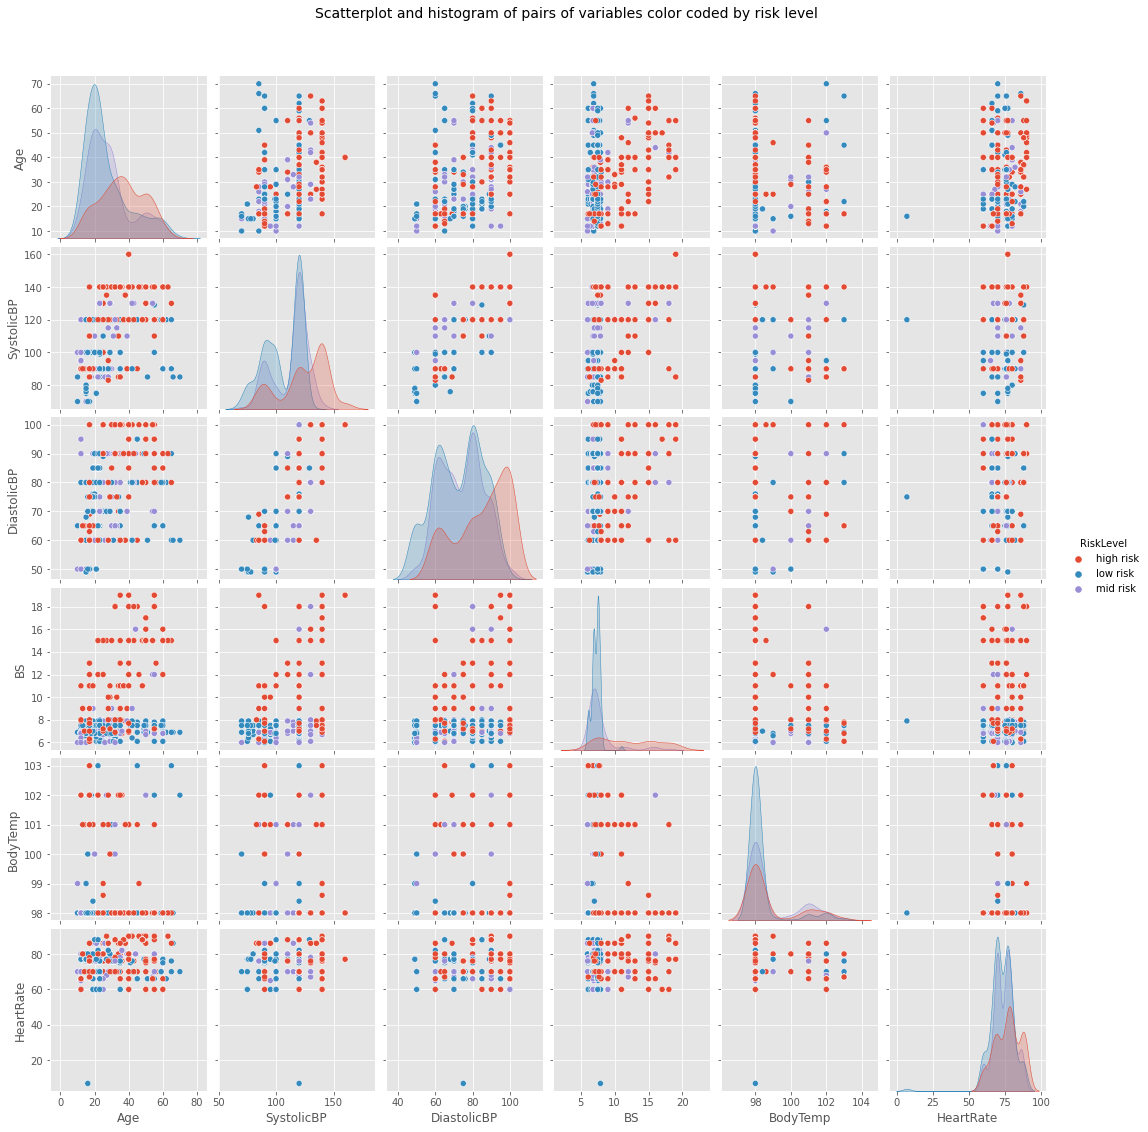

In [ ]:
g = sns.pairplot(dataset, hue='RiskLevel')
g.fig.suptitle("Scatterplot and histogram of pairs of variables color coded by risk level", 
               fontsize = 14, # defining the size of the title
               y=1.05); # y = definig title y position (height)

When looking at the plot, the ideal situation would be to have a clear separation between curves and dots. As we can see, the three types of risk classes are mostly mixed up, since trees internally draw lines when delimiting the spaces between points, we can hypothesize that more trees in the forest might be able to limit more spaces and better classify the points.

In [ ]:
#To be sure there are only three classes of RiskLevel in our data, and that no other values have been added erroneously, we can use unique() to display the column's unique values:

dataset['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [ ]:
dataset['RiskLevel'] = dataset['RiskLevel'].replace('low risk', 0).replace('mid risk', 1).replace('high risk', 2)


In [ ]:
y = dataset['RiskLevel']
X = dataset.drop(['RiskLevel'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=SEED)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=3, 
                             max_depth=2,
                             random_state=SEED)

In [ ]:
# Fit RandomForestClassifier
rfc.fit(X_train, y_train)
# Predict the test set labels
y_pred = rfc.predict(X_test)

DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1608637542)


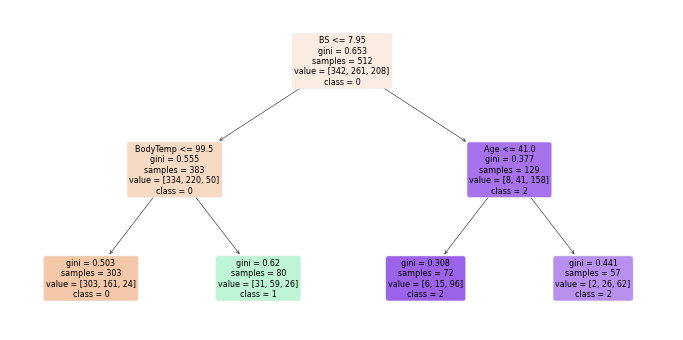

DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1273642419)


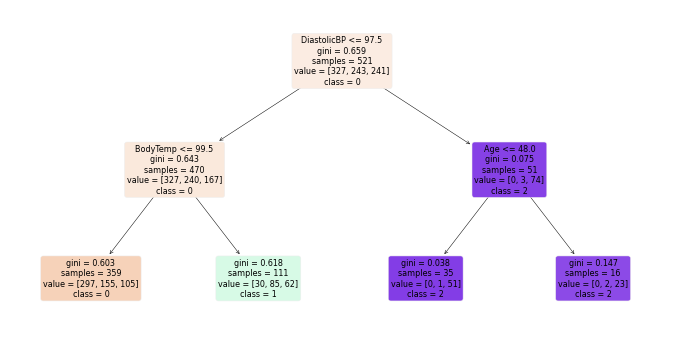

DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1935803228)


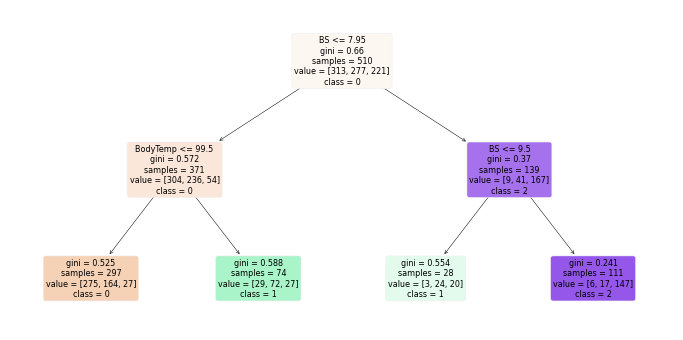

In [ ]:
from sklearn import tree

features = X.columns.values # The name of each column
classes = ['0', '1', '2'] # The name of each class
# You can also use low, medium and high risks in the same order instead
# classes = ['low risk', 'medium risk', 'high risk']

for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,
                   feature_names=features,
                   class_names=classes,
                   fontsize=8, 
                   filled=True, 
                   rounded=True)
    plt.show()

              precision    recall  f1-score   support

           0       0.53      0.89      0.66        80
           1       0.57      0.17      0.26        76
           2       0.74      0.72      0.73        47

    accuracy                           0.58       203
   macro avg       0.61      0.59      0.55       203
weighted avg       0.59      0.58      0.53       203



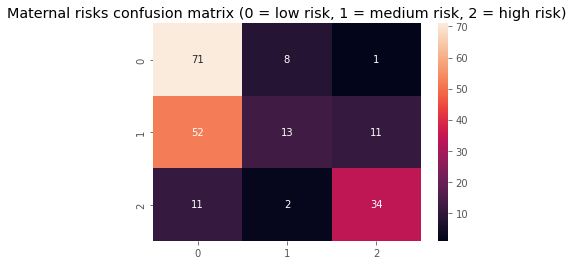

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Maternal risks confusion matrix (0 = low risk, 1 = medium risk, 2 = high risk)')

print(classification_report(y_test,y_pred))

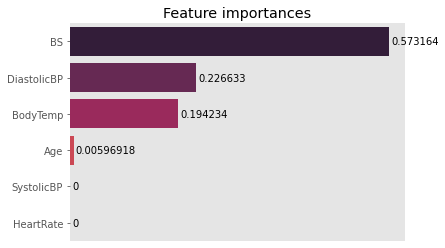

In [ ]:
import matplotlib 
# Organizing feature names and importances in a DataFrame
features_df = pd.DataFrame({'features': rfc.feature_names_in_, 'importances': rfc.feature_importances_ })

# Sorting data from highest to lowest
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

# Barplot of the result without borders and axis lines
g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
g.set_title('Feature importances')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

In [ ]:
rfc_ = RandomForestClassifier(n_estimators=900, 
                             max_depth=7,
                             random_state=SEED)
rfc_.fit(X_train, y_train)
y_pred = rfc_.predict(X_test)

              precision    recall  f1-score   support

           0       0.68      0.86      0.76        80
           1       0.75      0.58      0.65        76
           2       0.90      0.81      0.85        47

    accuracy                           0.74       203
   macro avg       0.78      0.75      0.75       203
weighted avg       0.76      0.74      0.74       203



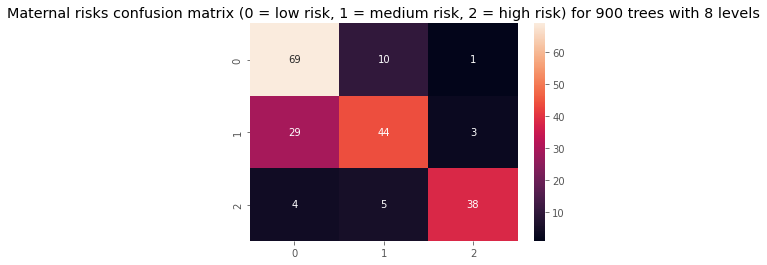

In [ ]:
cm_ = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_, annot=True, fmt='d').set_title('Maternal risks confusion matrix (0 = low risk, 1 = medium risk, 2 = high risk) for 900 trees with 8 levels')

print(classification_report(y_test,y_pred))



##**Extreme Gradient Boosting**



In [ ]:
!git clone --recursive https://github.com/dmlc/xgboost

fatal: destination path 'xgboost' already exists and is not an empty directory.


In [ ]:
!git submodule init
!git submodule update
!brew install gcc@8
!pip3 install xgboost

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
/bin/bash: brew: command not found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


[05:58:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


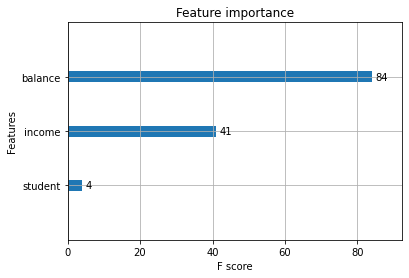

[[1921    5]
 [  52   22]]


In [ ]:
# Importing the libraries
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
 
# Importing the dataset
dataset = pd.read_csv('Default.csv')

dataset.default=pd.get_dummies(dataset.default,drop_first=True) # default = 1
dataset.student=pd.get_dummies(dataset.student,drop_first=True) # student = 1

y = dataset.default
X = dataset.iloc[:,2:]
X = sm.add_constant(X)
 
# Encoding categorical data
#labelencoder_X_1 = LabelEncoder()
#print(X)
#X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
#labelencoder_X_2 = LabelEncoder()
 
#X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
#onehotencoder = OneHotEncoder(categorical_features=[1])
 
#X = onehotencoder.fit_transform(X).toarray()
#X = X[:, 1:]
 
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
 
# Fitting XGBoost to the training data
my_model = xgb.XGBClassifier()
my_model.fit(X_train, y_train)
 
# Predicting the Test set results
y_pred = my_model.predict(X_test)
 
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)
# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth":4}


xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

xgb.plot_importance(xg_reg)
plt.show()
print(cm)

In [ ]:
cm_logit = confusion_matrix(y_test, y_pred)
#compare those predictions with actual
print(cm_logit)
print("Correct Classifications:", cm_logit[0][0]+cm_logit[1,1])
print("Incorrect Classifications:", cm_logit[0][1]+cm_logit[1,0])

[[1921    5]
 [  52   22]]
Correct Classifications: 1943
Incorrect Classifications: 57


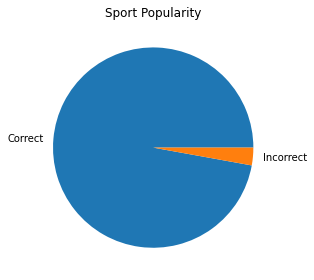

In [ ]:
import matplotlib.pyplot as plt
values = [cm_logit[0][0]+cm_logit[1][1], cm_logit[0][1]+cm_logit[1][0]]
labels = ['Correct', 'Incorrect']

fig, ax = plt.subplots()
ax.pie(values, labels=labels)
ax.set_title('Sport Popularity')
plt.tight_layout()

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1926
           1       0.81      0.30      0.44        74

    accuracy                           0.97      2000
   macro avg       0.89      0.65      0.71      2000
weighted avg       0.97      0.97      0.97      2000



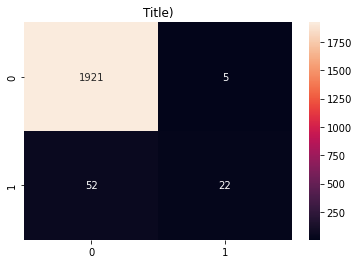

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Title)')

print(classification_report(y_test,y_pred))

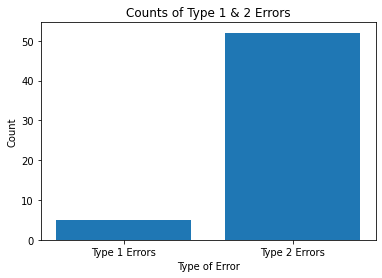

In [ ]:
import numpy as np
xaxis = ["Type 1 Errors", "Type 2 Errors"]
yaxis = cm_logit[0][1], cm_logit[1][0]
  
# making the bar chart on the data
plt.bar(xaxis, yaxis)
  
# calling the function to add value labels
plt.xlabel("Type Of Error")
plt.ylabel("Count")
  
# giving title to the plot
plt.title("Counts of Type 1 & 2 Errors")
  
# giving X and Y labels
plt.xlabel("Type of Error")
plt.ylabel("Count")
  
# visualizing the plot
plt.show()

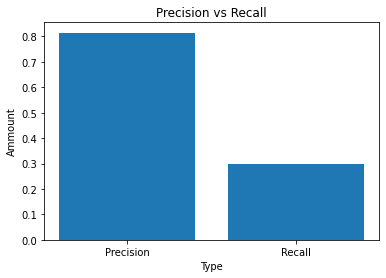

In [ ]:
import numpy as np
xaxis = ["Precision", "Recall"]
yaxis = [cm_logit[1][1]/(cm_logit[1][1]+cm_logit[0][1]), cm_logit[1][1]/(cm_logit[1][1]+cm_logit[1][0])]
  
# making the bar chart on the data
plt.bar(xaxis, yaxis)
  
# calling the function to add value labels
plt.xlabel("Type")
plt.ylabel("Ammount")
  
# giving title to the plot
plt.title("Precision vs Recall")
  
# visualizing the plot
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1926
           1       0.81      0.30      0.44        74

    accuracy                           0.97      2000
   macro avg       0.89      0.65      0.71      2000
weighted avg       0.97      0.97      0.97      2000





##**LightGBM**


From: https://www.kaggle.com/code/prashant111/lightgbm-classifier-in-python/notebook


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import lightgbm as ltb

In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

###Read Dataset

In [ ]:
# load and preview data
df = pd.read_csv('Breast_cancer_data.csv')
df.head()

FileNotFoundError: ignored

###View summary of dataset

In [ ]:
# view summary of dataset
df.info()

We can see that there are 6 columns in the dataset and there are no missing values.


###Check the distribution of target variable¶


target variable is diagnosis
check the distribution of the target variable.

In [ ]:
df['diagnosis'].value_counts()

The target variable is diagnosis. It contains 2 values - 0 and 1.

0 is for Negative prediction and 1 for Positive prediction.

We can see that the problem is binary classification task.

###Declare feature vector and target variable

In [ ]:
X = df[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']]
y = df['diagnosis']

###Split dataset into training and test set

In [ ]:
# split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

###LightGBM Model Development and Training

We need to convert our training data into LightGBM dataset format(this is mandatory for LightGBM training).

After creating the necessary dataset, we created a python dictionary with parameters and their values.

Accuracy of the model depends on the values we provide to the parameters.

In the end block of code, we simply trained model with 100 iterations.

In [ ]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

In [ ]:
lgb.plot_importance

###Model Prediction

In [ ]:
# predict the results
y_pred=clf.predict(X_test)

###View Accuracy

In [ ]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9240
Here, y_test are the true class labels and y_pred are the predicted class labels in the test-set.

###Compare train and test set accuracy

Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [ ]:
y_pred_train = clf.predict(X_train)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000

###Check for Overfitting

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

The training and test set accuracy are quite comparable. So, we cannot say there is overfitting.

###Confusion-matrix

In [ ]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

###Classification Metrices

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
model = ltb.LGBMClassifier()
model.fit(X_train, y_train)

6. LightGBM Parameter Tuning 
Table of Contents

In this section, I will discuss some tips to improve LightGBM model efficiency.

Following set of practices can be used to improve your model efficiency.

1 num_leaves : This is the main parameter to control the complexity of the tree model. Ideally, the value of num_leaves should be less than or equal to 2^(max_depth). Value more than this will result in overfitting.

2 min_data_in_leaf : Setting it to a large value can avoid growing too deep a tree, but may cause under-fitting. In practice, setting it to hundreds or thousands is enough for a large dataset.

3 max_depth : We also can use max_depth to limit the tree depth explicitly.

For Faster Speed
Use bagging by setting bagging_fraction and bagging_freq.
Use feature sub-sampling by setting feature_fraction.
Use small max_bin.
Use save_binary to speed up data loading in future learning.
For better accuracy
Use large max_bin (may be slower).
Use small learning_rate with large num_iterations
Use large num_leaves(may cause over-fitting)
Use bigger training data
Try dart
Try to use categorical feature directly.
To deal with over-fitting
Use small max_bin
Use small num_leaves
Use min_data_in_leaf and min_sum_hessian_in_leaf
Use bagging by set bagging_fraction and bagging_freq
Use feature sub-sampling by set feature_fraction
Use bigger training data
Try lambda_l1, lambda_l2 and min_gain_to_split to regularization
Try max_depth to avoid growing deep tree

###New Model

In [ ]:
    model = ltb.LGBMClassifier()
    model.fit(X_train, y_train)
    print(); print(model)
    
    expected_y  = y_test
    predicted_y = model.predict(X_test)

In [ ]:
ltb.plot_importance(model)

In [ ]:
gbm = lgb.LGBMClassifier(
    n_estimators=50,
    colnames=list(X.columns)
)

gbm.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=5,
    verbose=False,
)
print(gbm.feature_importances_)

from lightgbm.plotting import plot_importance
plot_importance(gbm, color='r', title='t', xlabel='x', ylabel='y')

In [ ]:
predicted_y = model.predict(X_test)
print(type(predicted_y))
print(type(y_test))
total = 0
diff = 0
predicted_y = np.array(predicted_y.tolist())
y_test = np.array(y_test.tolist())
for i in range(len(predicted_y)):
  diff = y_test[i]-predicted_y[i]
  if diff < 0:
    diff=diff*-1
  total+=diff
  times = i
avgdiff = total/times
print(avgdiff)

length = [i for i in range(len(predicted_y))]


plt.plot(length, y_test, label ='Actual')
plt.plot(length, predicted_y, '-.', label ='Prediction')

plt.xlabel("X-axis data")
plt.ylabel("Y-axis data")
plt.legend()
plt.title('multiple plots')
plt.show()

In [ ]:
i=0
count=0
for i in range(len(y_test)):
  if y_test[i]==predicted_y[i]:
    count+=1
print(count)
correct = count
incorrect = len(y_test)-count
import matplotlib.pyplot as plt
import numpy as np

y = np.array([correct, incorrect])
mylabels = ["Correct", "Incorrect"]


plt.pie(y, labels = mylabels)
plt.show() 

In [ ]:
import lightgbm as lgm
lgm.create_tree_digraph(model, tree_index=0)

In [ ]:
ltb.plot_tree(model)

In [ ]:
###New Model

In [ ]:
#@title Default title text
model = ltb.LGBMRegressor()
model.fit(X_train, y_train)
print(); print(model)

expected_y  = y_test
predicted_y = model.predict(X_test)

print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_log_error(expected_y, predicted_y))

filename = 'lightgbm_model.sav'
pickle.dump(model, open(filename, 'wb'))
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

In [ ]:
model.feature_importances


###New Model

In [ ]:
dataset = datasets.load_boston()
X = dataset.data; y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
model = ltb.LGBMRegressor()
model.fit(X_train, y_train)
print(); print(model)

expected_y  = y_test
predicted_y = model.predict(X_test)

In [ ]:
print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_log_error(expected_y, predicted_y))

In [ ]:
plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})

In [ ]:
ltb.LGBMClassifier()

In [ ]:
ltb.plot_importance(model)

In [ ]:
lgb.plot_metric(model)

###New Model

In [ ]:
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')

In [ ]:
lgb.plot_metric(model)

As you can see, the validation curve tends to increase after the 100th iteration; this can be fixed by setting and tuning the hyperparameters under the model. 

